<a href="https://www.kaggle.com/code/vnsmks/netflix-recommender-lab?scriptVersionId=274362981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎬 Netflix Recommender Lab

# 1. Introdução

## 📌 Sobre o Conjunto de Dados
A Netflix é uma das maiores plataformas de streaming do mundo, com mais de 200 milhões de assinantes em meados de 2021. Seu catálogo conta com mais de 8.000 filmes e séries. Este conjunto de dados apresenta uma tabela com todos os títulos disponíveis na plataforma, incluindo informações detalhadas como elenco, diretores, classificações indicativas, duração, ano de lançamento e outros atributos relevantes.

### 📊 Dicionário de Variáveis

| Coluna         | Descrição                                                                 |
|----------------|---------------------------------------------------------------------------|
| `show_id`      | Identificador único para cada filme ou série                              |
| `type`         | Tipo de conteúdo: "Movie" ou "TV Show"                                    |
| `title`        | Título do filme ou série                                                  |
| `director`     | Diretor do filme ou série (pode estar ausente)                            |
| `cast`         | Elenco do filme ou série                                                  |
| `country`      | País onde o conteúdo foi produzido                                        |
| `date_added`   | Data em que o título foi adicionado à Netflix                             |
| `release_year` | Ano de lançamento do conteúdo                                             |
| `rating`       | Classificação indicativa (ex: G, PG, R, TV-MA)                            |
| `duration`     | Duração em minutos (filmes) ou número de temporadas (séries)              |
| `listed_in`    | Gêneros ou categorias atribuídas ao conteúdo                              |
| `description`  | Breve sinopse ou descrição do conteúdo                                    |

## 📌 About the Dataset
Netflix is one of the largest streaming platforms in the world, with over 200 million subscribers as of mid-2021.
Its catalog includes more than 8,000 movies and TV shows. This dataset provides a tabular listing of all titles available on the platform, including detailed information such as cast, directors, content ratings, duration, release year, and other relevant attributes.


### 📊 Dataset Features

| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `show_id`      | Unique ID for each Movie/TV Show                                            |
| `type`         | Identifier: either "Movie" or "TV Show"                                     |
| `title`        | Title of the Movie/TV Show                                                  |
| `director`     | Director of the Movie/TV Show (if not available, then NaN)                  |
| `cast`         | Cast of the Movie/Show                                                      |
| `country`      | Country where the Movie/Show was produced                                   |
| `date_added`   | Date when it was published on Netflix                                       |
| `release_year` | Year when the Movie/Show was released                                       |
| `rating`       | TV rating of the Movie/Show (e.g., G, PG, R, TV-MA)                         |
| `duration`     | Duration — minutes for movies, number of seasons for TV shows              |
| `listed_in`    | Genres or categories assigned to the content                                |
| `description`  | Short plot summary or description                                           |

# 2. Importação de Bibliotecas

In [1]:
import pandas as pd  # Biblioteca principal para manipulação e análise de dados em tabelas (DataFrames)
import numpy as np  # Suporte para operações numéricas e arrays multidimensionais
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos estáticos 
import seaborn as sns  # Biblioteca baseada no matplotlib, com foco em visualizações estatísticas mais bonitas e informativas
import plotly.express as px  # Biblioteca para gráficos interativos
from wordcloud import WordCloud # Importa a classe WordCloud para gerar nuvens de palavras a partir de textos.
from sklearn.feature_extraction.text import TfidfVectorizer  # Importa o vetorizador TF-IDF para transformar textos em vetores numéricos.
from sklearn.metrics.pairwise import linear_kernel # Importa a função para calcular similaridade entre vetores (produto escalar).
from ipywidgets import interact, widgets # Importa ferramentas para criar interfaces interativas no Jupyter/Kaggle Notebook
from IPython.display import display # Importa a função display para mostrar objetos de forma mais amigável no notebook

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Configurações de visualização
sns.set(style="whitegrid")  # Define o estilo dos gráficos do seaborn como "whitegrid" (fundo branco com grade)
plt.rcParams["figure.figsize"] = (10, 6)  # Define o tamanho padrão dos gráficos do matplotlib

# 3. Carregamento do Dataset

In [3]:
# Carregar o dataset
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows-dataset/netflix_titles.csv.csv')

In [4]:
# Visualizar as primeiras linhas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Exibir informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 4. Limpeza e Pré-processamento

## 4.1 Tratamento de valores ausentes

In [6]:
# Verificar valores ausentes
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# director, cast, country: manter NaN ou usar marcador neutro para visualização
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not specified')
df['country'] = df['country'].fillna('Unknown')

In [8]:
# Na coluna 'rating' usar padrão comum "Not Rated"
df['rating'] = df['rating'].fillna('Not Rated')

## 4.2 Conversão de datas

In [9]:
# Converter a coluna 'date_added' para datetime e manter NaT (valor nulo)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


## 4.3 Separação de colunas compostas

In [10]:
# Separar gêneros (listed_in) em listas
df['genres'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])

In [11]:
# Separar elenco em listas
df['cast_list'] = df['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')] if isinstance(x, str) else [])

## 4.4 Conversão de duração

In [12]:
# Criar colunas separadas para tipo de duração e valor numérico
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)

## 4.5 Resultado após as alterações

In [13]:
# Exibir informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8804 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  genres         8807 non-null   object        
 13  cast_list      8807 non-null   object        
 14  duration_type  8804 non-null   object        
 15  duration_int   8804 n

# 5. Análise Exploratória de Dados (EDA)

## 5.1 Distribuição de Filmes e Série no catálogo da Netflix

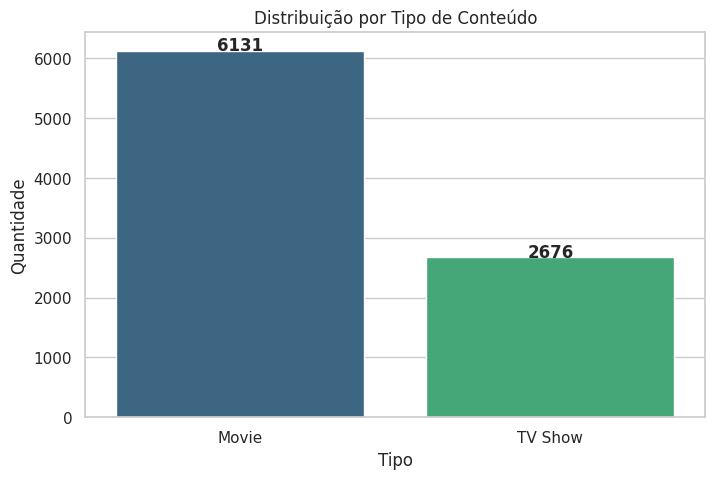

In [14]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")

plt.title("Distribuição por Tipo de Conteúdo")
plt.ylabel("Quantidade")
plt.xlabel("Tipo")

# Exibir os valores acima das barras
for i, v in enumerate(type_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

## 5.2 Lançamentos por Ano

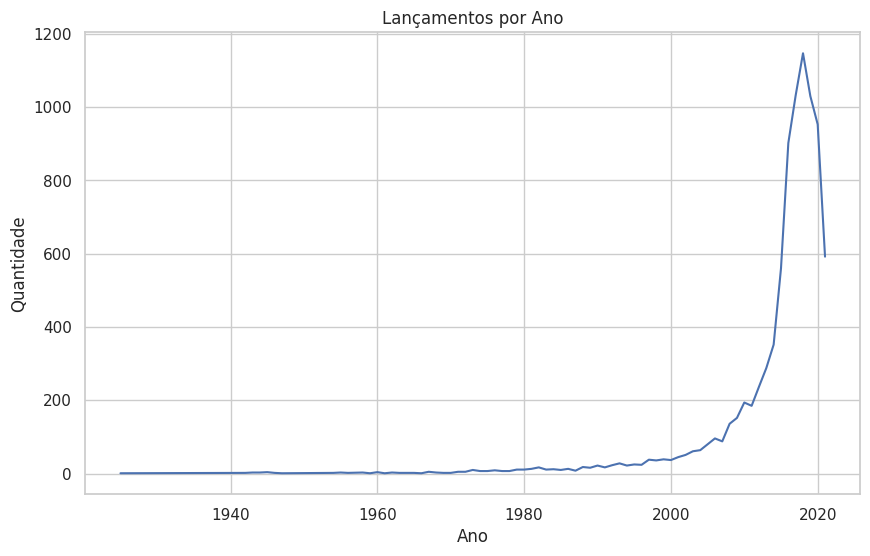

In [15]:
release_year_counts = df['release_year'].value_counts().sort_index()
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values)
plt.title("Lançamentos por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.show()

In [16]:
releases_per_year = df['release_year'].value_counts().sort_index()
print(releases_per_year)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


In [17]:
releases_2000_2021 = releases_per_year.loc[2000:2021]
print(releases_2000_2021)


release_year
2000      37
2001      45
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


In [18]:
releases_per_year = df['release_year'].value_counts().sort_index()
total_lancamentos = releases_per_year.loc[2000:2021].sum()
print(f"Total de lançamentos entre 2000 e 2021: {total_lancamentos}")

Total de lançamentos entre 2000 e 2021: 8282


## 5.3 Gêneros mais Frequentes

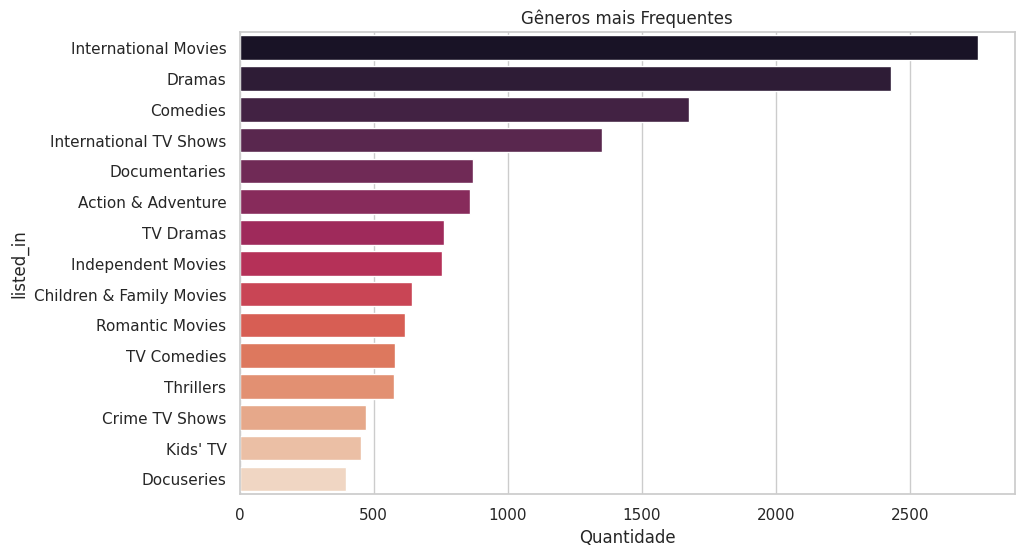

In [19]:
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="rocket")
plt.title("Gêneros mais Frequentes")
plt.xlabel("Quantidade")
plt.show()

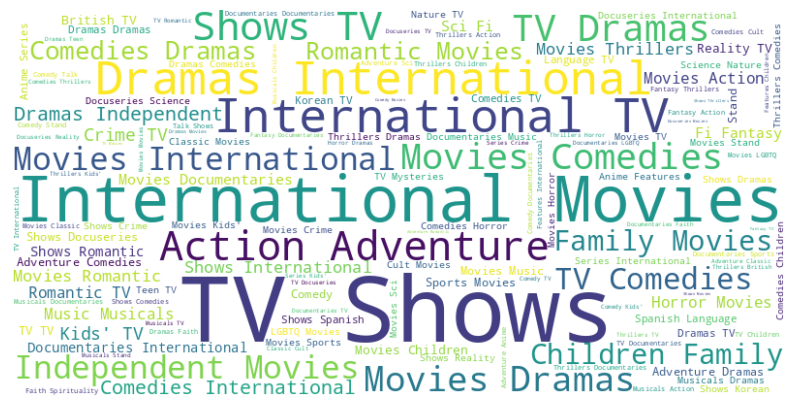

In [20]:
# Nuvem de palavras para gêneros
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(genres))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5.4 Classificações Indicativas

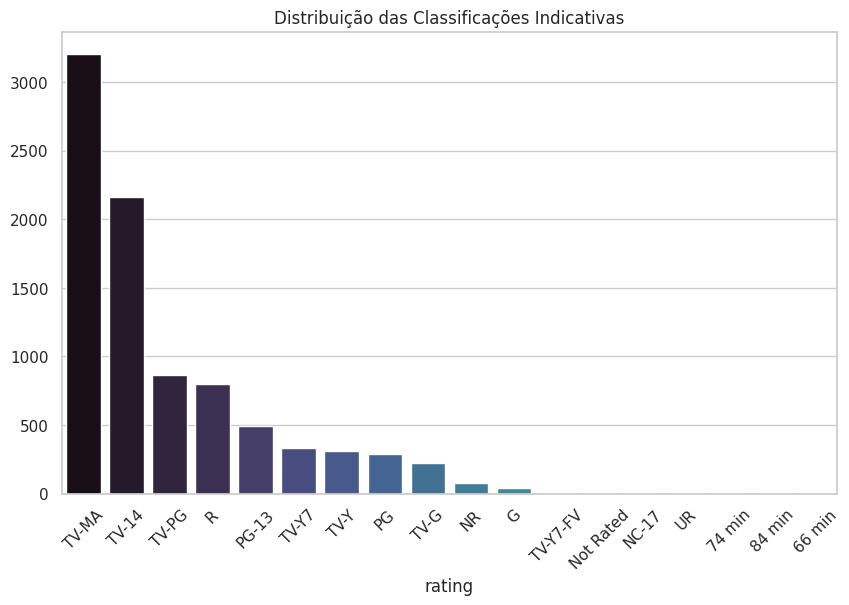

In [21]:
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="mako")
plt.title("Distribuição das Classificações Indicativas")
plt.xticks(rotation=45)
plt.show()

### Observações:

* TV-MA é a mais comum (conteúdo adulto).
* Há valores estranhos como 66 min, 74 min, 84 min que parecem erros na coluna rating.

In [22]:
# Contar todas as classificações indicativas
rating_counts = df['rating'].value_counts().sort_index()

# Imprimir
print("Classificações indicativas e suas quantidades:\n")
for rating, count in rating_counts.items():
    print(f"{rating}: {count}")

Classificações indicativas e suas quantidades:

66 min: 1
74 min: 1
84 min: 1
G: 41
NC-17: 3
NR: 80
Not Rated: 4
PG: 287
PG-13: 490
R: 799
TV-14: 2160
TV-G: 220
TV-MA: 3207
TV-PG: 863
TV-Y: 307
TV-Y7: 334
TV-Y7-FV: 6
UR: 3


In [23]:
# Substituir valores que contêm 'min' por "Not Rated"
df['rating'] = df['rating'].replace(to_replace=r'.*min.*', value='Not Rated', regex=True)

## 5.5 Países com Mais Contéudos

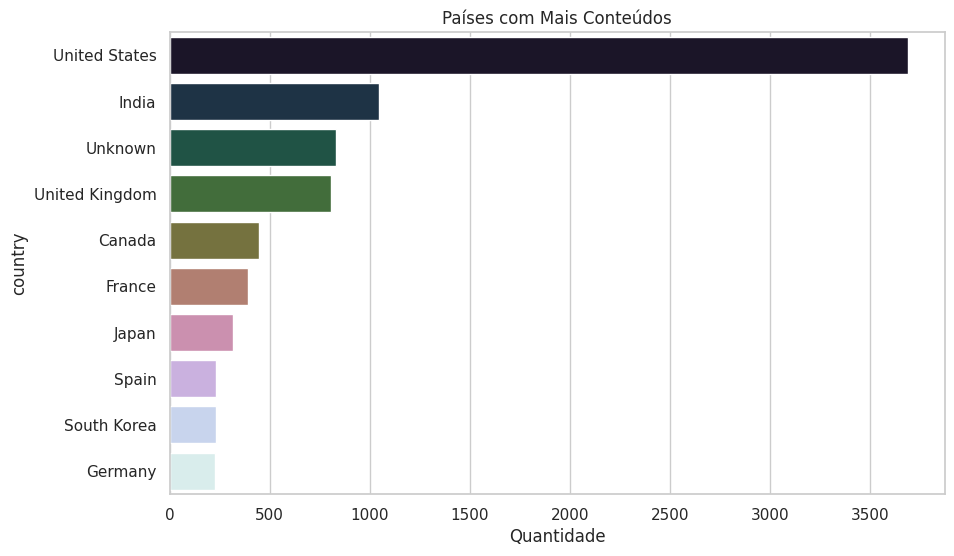

In [24]:
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("Países com Mais Conteúdos")
plt.xlabel("Quantidade")
plt.show()

## 5.6 Diretores e Atores Mais Frequentes

In [25]:
# Diretores
directors = df['director'].dropna().str.split(',').explode().str.strip()
print("Diretores:\n", directors.value_counts().head(15))

Diretores:
 director
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Youssef Chahine          12
Steven Spielberg         11
Don Michael Paul         10
Yılmaz Erdoğan            9
David Dhawan              9
Name: count, dtype: int64


In [26]:
# Atores
actors = df['cast'].dropna().str.split(',').explode().str.strip()
print("Atores:\n", actors.value_counts().head(15))

Atores:
 cast
Not specified       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Vincent Tong         26
Rajesh Kava          26
Name: count, dtype: int64


# 6. Sistema de Recomendação 🤖

📌 Técnica utilizada no sistema:

TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica usada para transformar textos em números, destacando as palavras mais importantes em um documento.

* TF (Frequência do termo): mede quantas vezes uma palavra aparece em um documento.
* IDF (Frequência inversa nos documentos): penaliza palavras muito comuns em todos os documentos, dando mais peso às palavras únicas.

## 6.1 Sistema baseado em conteúdo (TF-IDF + descrição)

📌 Utiliza a descrição dos filmes e séries para recomendar outros semelhantes. Aplica o TF-IDF para transformar textos em vetores e calcula a similaridade entre eles.

In [27]:
# Criar matriz TF-IDF para descrições
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

In [28]:
# Calcular similaridade coseno
cosine_sim_desc = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
# Índices para títulos
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [30]:
# Função de recomendação
def recommend_by_description(title, num_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        return f"Título '{title}' não encontrado."
    sim_scores = list(enumerate(cosine_sim_desc[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return df[['title', 'description']].iloc[movie_indices]

In [31]:
# Teste
recommend_by_description('Star Trek')

,title,description
592,She's Out of My League,Kirk's a 5. His new girlfriend Molly's a 10. N...
4946,Star Trek: The Next Generation,Decades after the adventures of the original E...
2005,Lara and the Beat,"When their glamorous, fast-paced lifestyle com..."
2647,My Stupid Boss 2,"Having driven away many of his employees, Boss..."
8586,Thumper,After moving to a hardscrabble suburban Califo...


## 6.2 Sistema baseado em gêneros

📌 Recomenda itens que pertencem aos mesmos gêneros que o usuário costuma consumir.

In [32]:
def recommend_by_genre(title, num_recommendations=5):
    if title not in df['title'].values:
        return f"Título '{title}' não encontrado."
    target_genres = df[df['title'] == title]['listed_in'].values[0]
    genre_matches = df[df['listed_in'] == target_genres]
    return genre_matches[['title', 'listed_in']].head(num_recommendations)

In [33]:
# Teste
recommend_by_genre('The Starling')

,title,listed_in
9,The Starling,"Comedies, Dramas"
352,The Edge of Seventeen,"Comedies, Dramas"
582,Mother's Day,"Comedies, Dramas"
1262,Ginny & Georgia - The Afterparty,"Comedies, Dramas"
1287,Fate: The Winx Saga - The Afterparty,"Comedies, Dramas"


# 7. Teste Interativo do Sistema de Recomendação

In [34]:
# Criar coluna auxiliar com títulos em minúsculas para facilitar buscas
df['title_lower'] = df['title'].str.lower()

# Funções de recomendação
def recommend_by_description(title, num_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        return pd.DataFrame([{"title": f"Título '{title}' não encontrado."}])
    sim_scores = list(enumerate(cosine_sim_desc[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return df[['title', 'description']].iloc[movie_indices]

def recommend_by_genre(title, num_recommendations=5):
    if title not in df['title'].values:
        return pd.DataFrame([{"title": f"Título '{title}' não encontrado."}])
    target_genres = df[df['title'] == title]['listed_in'].values[0]
    genre_matches = df[df['listed_in'] == target_genres]
    return genre_matches[['title', 'listed_in']].head(num_recommendations)

In [35]:
# Interface interativa com Dropdown
def mostrar_recomendacoes(title):
    print(f"\n🔍 Título buscado: {title}")
    
    print("\n🎬 Recomendações por Descrição:")
    display(recommend_by_description(title))
    
    print("\n🎭 Recomendações por Gênero:")
    display(recommend_by_genre(title))

In [36]:
# Dropdown com autocompletar para busca de título
title_dropdown = widgets.Dropdown(
    options=sorted(df['title'].dropna().unique()),
    description='Buscar título:',
    layout=widgets.Layout(width='80%'),
    style={'description_width': 'initial'}
)

In [37]:
# Exibir interface interativa
interactive_widget = widgets.interactive(mostrar_recomendacoes, title=title_dropdown)
display(interactive_widget)

interactive(children=(Dropdown(description='Buscar título:', layout=Layout(width='80%'), options=('#Alive', '#…

# 8. Conclusões e Insights 

## 🔍 Principais descobertas

* O sistema baseado em descrição (TF-IDF) consegue identificar filmes com enredos semelhantes, mesmo que os gêneros sejam diferentes.
* O sistema baseado em gêneros é útil para quem gosta de um tipo específico de conteúdo (ex: comédias românticas, documentários)

## 📈 Tendências observadas

* Os EUA são o país com mais títulos no dataset, o que reflete a posição dominante da indústria audiovisual americana.
* TV-MA (conteúdo adulto/maduro) domina com 3207 títulos, mostrando que a plataforma prioriza produções voltadas para público adulto.
* TV-14 e TV-PG também aparecem com números altos, sugerindo foco em séries para adolescentes e público geral.

## 💭 Reflexões sobre o catálogo da Netflix

* O catálogo é bastante diversificado, mas há uma concentração de títulos em alguns gêneros e anos específicos.
* Sistemas de recomendação simples já conseguem oferecer sugestões relevantes, mas podem ser aprimorados com mais dados (ex: avaliações, tempo de visualização).

# 9. Aprofundando a análise

## 9.1 Clustering, PCA e K-Means

📌 O clustering é uma técnica de aprendizado não supervisionado usada para agrupar itens semelhantes sem precisar de rótulos.

In [38]:
# Importação bibliotecas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Combinar atributos: descrição + gêneros + país
df['combined_text'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['country']

# Vetorização TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

In [40]:
# Aplicar K-Means
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [41]:
# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
df['x'] = reduced_data[:, 0]
df['y'] = reduced_data[:, 1]

In [42]:
# Visualização dos clusters
fig = px.scatter(df, x='x', y='y', color=df['cluster'].astype(str),
                 hover_data=['title', 'listed_in', 'country'],
                 title='Títulos da Netflix por Similaridade de Conteúdo')

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

📌 **Observações:**

* O algoritmo analisou descrição, gêneros e país de cada título.
* Criou 7 grupos (clusters) com base na similaridade textual.
* Cada cluster tende a representar um tema ou padrão.

## 9.2 Recomendações baseadas em cluster

In [43]:
def recommend_titles(title, df, top_n=5):
    title_cluster = df.loc[df['title'] == title, 'cluster'].values[0]
    similar_titles = df[df['cluster'] == title_cluster]
    similar_titles = similar_titles[similar_titles['title'] != title]
    return similar_titles.sample(min(top_n, len(similar_titles)))[['title', 'listed_in', 'country']]

In [44]:
# Exemplo
recommend_titles("Stranger Things", df)

,title,listed_in,country
772,Summertime,"International TV Shows, Romantic TV Shows, TV ...",Italy
4381,Silvana Sin Lana,"Romantic TV Shows, Spanish-Language TV Shows, ...",United States
1516,Home for Christmas,"International TV Shows, Romantic TV Shows, TV ...",Norway
2892,Hyena,"International TV Shows, Korean TV Shows, Roman...",South Korea
3680,Free Rein,"British TV Shows, Kids' TV, TV Dramas",United States


## 9.3 Análise de tendências

In [45]:
trend = df.groupby(['release_year', 'cluster']).size().reset_index(name='count')

fig = px.line(
    trend, 
    x='release_year', y='count', color='cluster',
    title='Quantidade de Lançamentos por Ano'
)
fig.show()

## 9.4 Exploração visual do catálogo da Netflix

In [46]:
fig = px.scatter(
    df, x='x', y='y', color=df['cluster'].astype(str),
    hover_data=['title', 'listed_in', 'country', 'release_year'],
    title='Mapa Interativo do Catálogo Netflix'
)
fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

In [47]:
# Análise semântica dos clusters

def palavras_chave_cluster(cluster_id, tfidf, tfidf_matrix, df, top_n=10):
    idxs = df[df['cluster'] == cluster_id].index
    mean_tfidf = tfidf_matrix[idxs].mean(axis=0)
    terms = np.array(tfidf.get_feature_names_out())
    top_terms = terms[np.argsort(mean_tfidf.A1)[::-1][:top_n]]
    return top_terms

for i in range(num_clusters):
    print(f"Cluster {i}: {palavras_chave_cluster(i, tfidf, tfidf_matrix, df)}")


Cluster 0: ['action' 'adventure' 'movies' 'united' 'states' 'international' 'fi'
 'sci' 'fantasy' 'dramas']
Cluster 1: ['movies' 'international' 'dramas' 'india' 'comedies' 'romantic'
 'independent' 'man' 'young' 'woman']
Cluster 2: ['tv' 'shows' 'international' 'crime' 'dramas' 'romantic' 'british'
 'series' 'unknown' 'united']
Cluster 3: ['stand' 'comedy' 'comedian' 'special' 'united' 'states' 'talk' 'comic'
 'stage' 'takes']
Cluster 4: ['children' 'family' 'movies' 'united' 'states' 'comedies' 'unknown'
 'save' 'canada' 'new']
Cluster 5: ['united' 'states' 'tv' 'movies' 'dramas' 'comedies' 'kids' 'thrillers'
 'independent' 'docuseries']
Cluster 6: ['documentaries' 'documentary' 'united' 'states' 'music' 'movies'
 'musicals' 'sports' 'international' 'kingdom']


In [48]:
fig = px.scatter(
    df, x='x', y='y', color=df['cluster'].astype(str),
    hover_data=['country'],
    title='Mapa Interativo do Catálogo Netflix'
)
fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()